In [1]:
from __future__ import print_function

import numpy as np
import sys
import thinkstats2
import thinkplot
import nsfg
import first

In [2]:
def PmfMean(pmf):
    mean = 0.0
    for x, p in pmf.d.items():
        mean += p * x
    return mean

In [3]:
def PmfVar(pmf, mu=None):
    if mu is None:
        mu = pmf.Mean()

    var = 0.0
    for x, p in pmf.d.items():
        var += p * (x - mu) ** 2
    return var

In [4]:
def Diffs(t):
    first = t[0]
    rest = t[1:]
    diffs = [first - x for x in rest]
    return diffs

In [5]:
def PairDifferences(live):
    live = live[live.prglngth >= 37]
    preg_map = nsfg.MakePregMap(live)

    diffs = []
    for caseid, indices in preg_map.items():
        lengths = live.loc[indices].prglngth.values
        if len(lengths) >= 2:
            diffs.extend(Diffs(lengths))

    mean = thinkstats2.Mean(diffs)
    print('Mean difference between pairs', mean)

    pmf = thinkstats2.Pmf(diffs)
    thinkplot.Hist(pmf, align='center')
    thinkplot.Show(xlabel='Diff in weeks',ylabel='Pmf')

Mean difference between pairs 0.18850574712643678


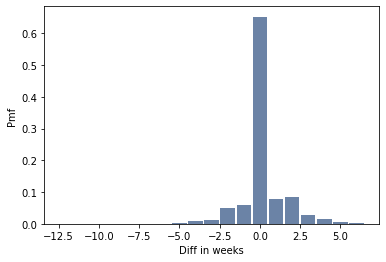

mean/var preg length 38.56055968517709 7.301863788195439
All tests passed.


<Figure size 576x432 with 0 Axes>

In [6]:
 live, firsts, others = first.MakeFrames()
 PairDifferences(live)

 # test PmfMean and PmfVar
 prglngth = live.prglngth
 pmf = thinkstats2.Pmf(prglngth)
 mean = PmfMean(pmf)
 var = PmfVar(pmf)

 assert(mean == pmf.Mean())
 assert(var == pmf.Var())
 print('mean/var preg length', mean, var)

 print('All tests passed.')